In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Covonutional_neural_network.modelUttils.loaddataset import load_dataset 
from Covonutional_neural_network.modelUttils.augment_dataset import add_label_noise

In [2]:
folder_paths = [
    "C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\digitdataset1",
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\-',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\(',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\)',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\+',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\x',
    'C:\\Users\\visha\\OneDrive\\Desktop\\entiredataset\\symbols\\÷',
]

In [3]:
X, y = load_dataset(folder_path=folder_paths)

Loading Dataset .............
Total images lodded: 104366


In [4]:
X.shape

torch.Size([104366, 1, 28, 28])

In [5]:
X = X.reshape(-1, 28*28)

c:\Users\visha\OneDrive\Desktop\MathAI\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


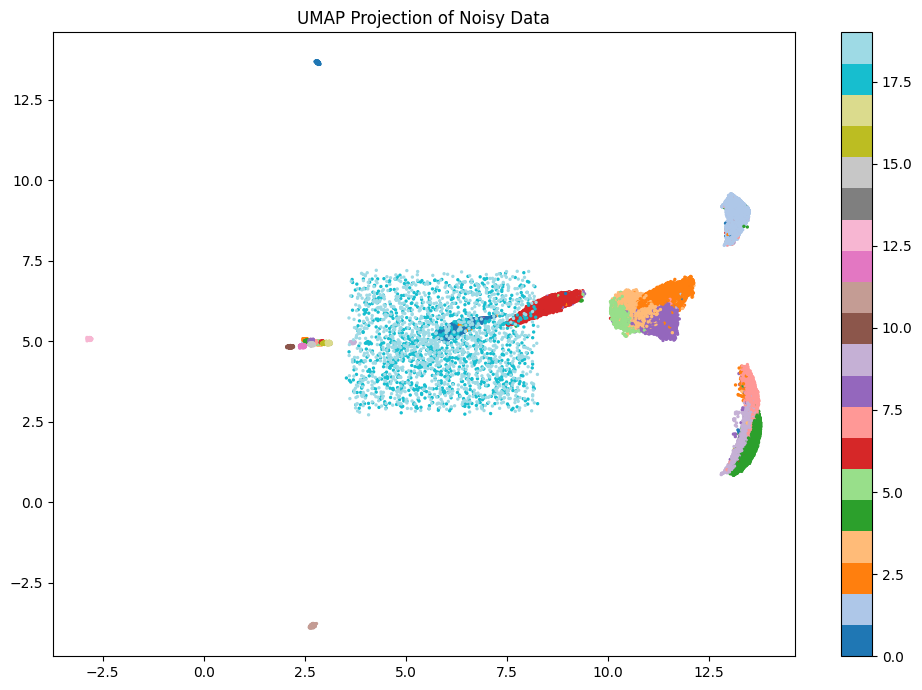

In [23]:
import umap.umap_ as umap
umap_model = umap.UMAP(n_components=701)
X_umap = umap_model.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='tab20', s=2)
plt.title("UMAP Projection of Noisy Data")
plt.colorbar()
plt.tight_layout()
plt.show()


In [7]:
X -= X.mean(axis=0)
cov = X.T@X / X.shape[0]

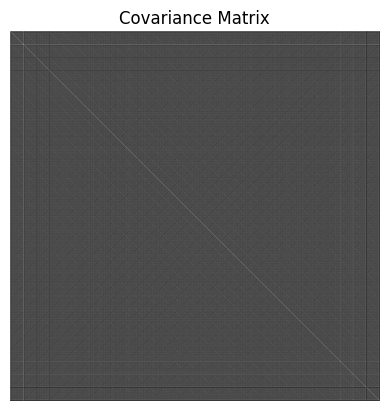

In [8]:
plt.imshow(cov,cmap='gray')
plt.title('Covariance Matrix')
plt.axis('off')
plt.show()

In [9]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
sorted_eigenvalues = np.argsort(eigenvalues)[::-1]

In [10]:
rule = np.cumsum(sorted_eigenvalues)/np.sum(sorted_eigenvalues)
rule = rule[rule>0.95]
rule

array([0.95027302, 0.95120155, 0.95212357, 0.95304884, 0.9539676 ,
       0.9548831 , 0.95579534, 0.95670433, 0.95756119, 0.9584213 ,
       0.9592749 , 0.96012524, 0.96097232, 0.96181614, 0.96265345,
       0.96349402, 0.96432807, 0.96515886, 0.96598639, 0.96681067,
       0.9675763 , 0.96835822, 0.96913689, 0.96990904, 0.97068444,
       0.97145333, 0.97220267, 0.97295527, 0.97371113, 0.97447351,
       0.97523262, 0.97592658, 0.97662379, 0.97731449, 0.97799215,
       0.97867308, 0.97936052, 0.9800447 , 0.98071911, 0.98139026,
       0.98205815, 0.98266414, 0.98326687, 0.98386634, 0.98446256,
       0.98505552, 0.98563544, 0.98622514, 0.98681158, 0.98739477,
       0.98796818, 0.98854484, 0.98911499, 0.98958089, 0.99006633,
       0.99055503, 0.99104699, 0.99152918, 0.99200485, 0.99247726,
       0.99295619, 0.99342534, 0.99388472, 0.99434084, 0.99480348,
       0.99525634, 0.99570595, 0.99615229, 0.99659538, 0.99703521,
       0.99728282, 0.99752717, 0.99776826, 0.9980061 , 0.99824

In [18]:
W = eigenvectors[:, :len(eigenvectors) - len(rule)]
W.shape

torch.Size([784, 701])

In [19]:
new_X = W.T @ X.T 

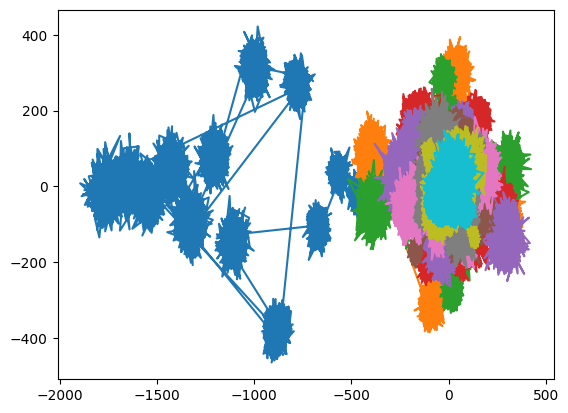

In [20]:
plt.plot(new_X[0], new_X[1], new_X[2], new_X[3], new_X[4], new_X[5], new_X[6], new_X[7], new_X[8], new_X[9], new_X[10], new_X[11], new_X[12], new_X[13], new_X[14], new_X[15], new_X[16], new_X[17], new_X[18], new_X[19])


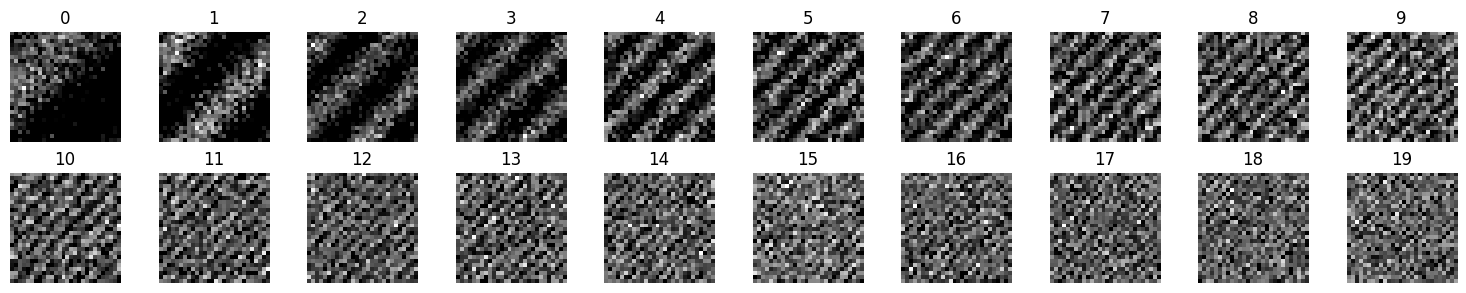

In [14]:
fig, axs = plt.subplots(2, 10, figsize=(15, 3))
for label in range(20):
    sample = add_label_noise(np.zeros((28, 28)), label)
    axs[label//10][label%10].imshow(sample, cmap='gray')
    axs[label//10][label%10].set_title(str(label))
    axs[label//10][label%10].axis('off')
plt.tight_layout()
plt.show()
